# Use first rows to find a game and a player

## Then run the bottom cell

**Then run the report cell**

In [26]:
from statsbombpy import sb
import pandas as pd
pd.options.display.max_rows = 500

In [7]:
sb.competitions()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-07-25T10:28:52.038697,None,None,2023-07-25T10:28:52.038697
1,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
2,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
3,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
7,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
8,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
9,16,22,Europe,Champions League,male,False,False,2010/2011,2022-01-26T21:07:11.033473,2021-06-13T16:17:31.694,None,2022-01-26T21:07:11.033473


In [27]:
sb.matches(competition_id=35, season_id=75).sort_values('home_score',ascending=False)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
2,3750245,1989-03-15,20:30:00.000,Europe - UEFA Europa League,1988/1989,Napoli,Juventus,3,0,available,...,2021-06-13T16:17:31.694,9,Quarter-finals,Stadio Diego Armando Maradona,Siegfried Kirschen,Ottavio Bianchi,Dino Zoff,1.1.0,2,2
0,3887188,1989-05-03,21:30:00.000,Europe - UEFA Europa League,1988/1989,Napoli,VfB Stuttgart,2,1,available,...,None,12,Final,Stadio Diego Armando Maradona,Gerasimos Germanakos,Ottavio Bianchi,Arie Haan,1.1.0,2,2
1,3750244,1989-04-05,None,Europe - UEFA Europa League,1988/1989,Napoli,Bayern Munich,2,0,available,...,2021-06-13T16:17:31.694,10,Semi-finals,Stadio Diego Armando Maradona,Michel Vautrot,,,1.1.0,2,2


In [28]:
sb.lineups(match_id=3887188)

{'Napoli':     player_id                player_name player_nickname  jersey_number  \
 0       19624               Ciro Ferrara            None              2   
 1       38641     Diego Armando Maradona            None             10   
 2       39815          Giuliano Giuliani            None              1   
 3       39816        Giancarlo Corradini            None              4   
 4       39817          Alessandro Renica            None              6   
 5       39818         Antonio Carannante            None             13   
 6       39819          Giovanni Francini            None              3   
 7       39820             Massimo Crippa            None             14   
 8       39822           Andrea Carnevale            None             11   
 9       39826  Antônio de Oliveira Filho          Careca              9   
 10      39829   Ricardo Rogério de Brito          Alemão              5   
 11      39843                  Luca Fusi            None              7   
 1

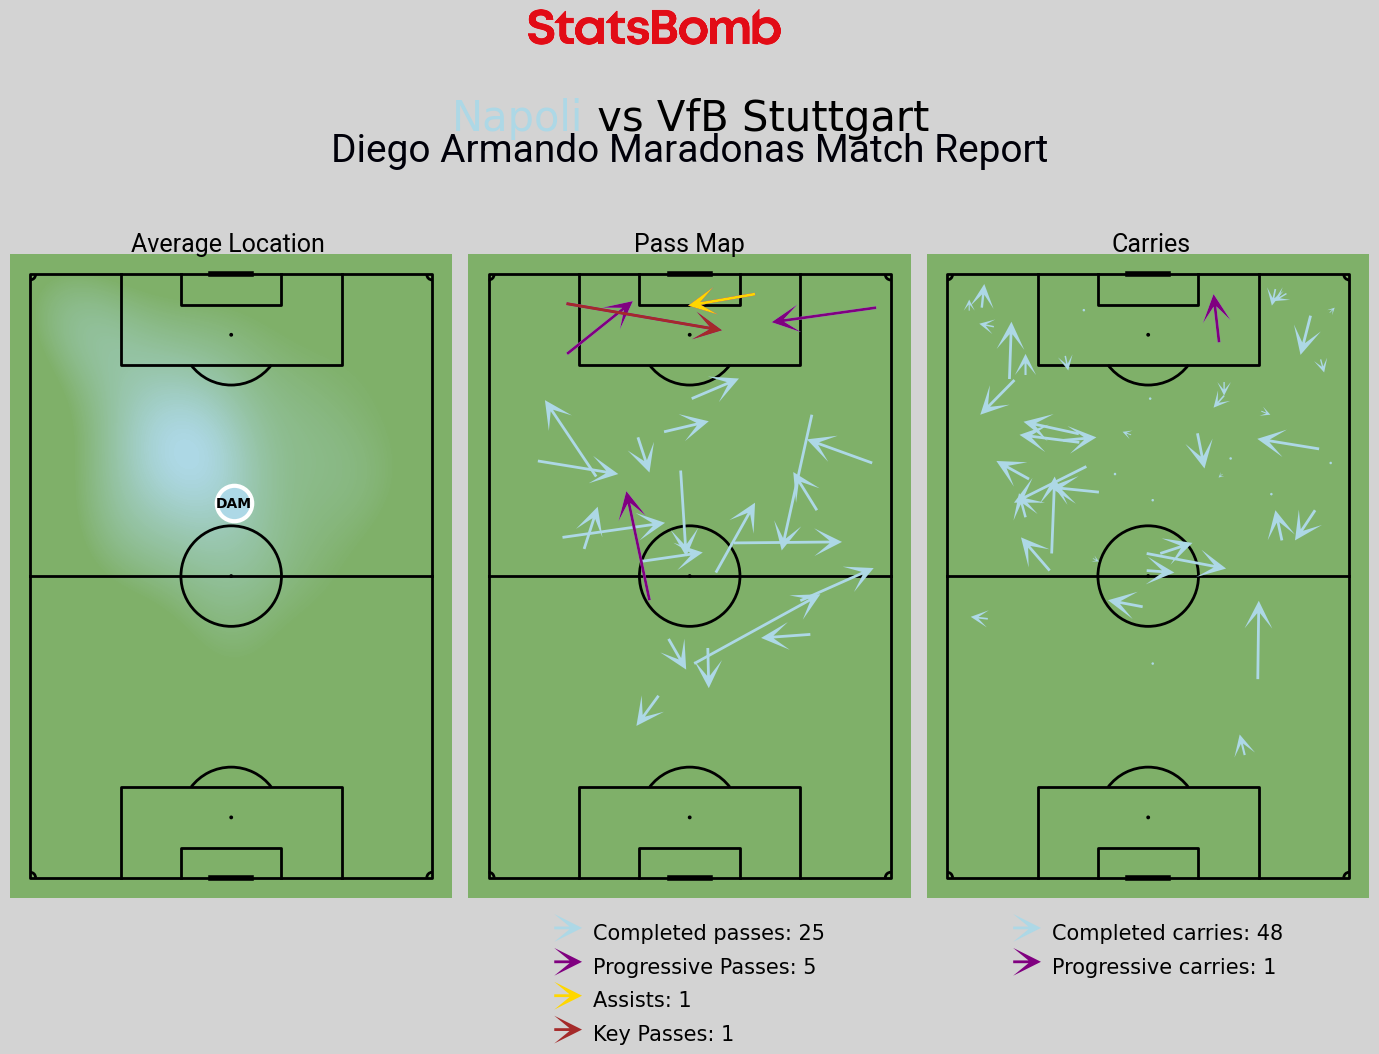

In [31]:
playerReport(matchId=3887188,
            player='Diego Armando Maradona', # Player name
            homeColor='lightblue',# Home team color
            edgeColor='white', # edgecolor of averagelocation and shots
            lines=False, # 'True' for the avg location player to have lines
            thirdplot='carries', # can be 'defensive actions' or 'carries' or 'shotmap'
            save='y' # 'y' for saving plot, 'n' for dont
           )

In [21]:
def playerReport(matchId, player, homeColor, edgeColor, lines, thirdplot, save):
 
#     Imports
    %matplotlib inline

    from statsbombpy import sb

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    from matplotlib import font_manager as fm, rcParams
    from mplsoccer.pitch import Pitch

    from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
    from mplsoccer.utils import FontManager
    from matplotlib.colors import to_rgba, LinearSegmentedColormap
    import matplotlib.gridspec as gridspec
    import matplotlib.patheffects as path_effects

    from PIL import Image

    from highlight_text import HighlightText, ax_text, fig_text
    import cmasher as cmr
    
#     Match import
    parser = Sbopen()
    match = matchId
    match_files = [match]
    df = pd.concat([parser.event(file)[0] for file in match_files])
    lineups = parser.lineup(match)
   
#     Replace player names with player nickname

    short_names = lineups[['player_id', 'player_nickname', 'jersey_number']]
    jersey_numbers = short_names[['player_nickname', 'jersey_number']]
    df = df.merge(short_names, on='player_id')


    teamName = df[df['player_nickname']==player]
    teamName = teamName['team_name'].tolist()[0]

    opponent = df[df['team_name']!=teamName]
    opponent = opponent['team_name'].tolist()[0]
    
#     remove penalties from the df
    df = df[df['period']<5]
    
#     Drop the fullname and only leave the player_nickname
    df.drop('player_name',axis=1, inplace=True)

#    Statsbomb logo and fonts  
    Statsbomb = Image.open(r"C:\Users\Gusse\OneDrive\Dokumenter\Python\Football\Womens Euro 2022\sb_text_logo.png")
    URL = 'https://raw.githubusercontent.com/google/fonts/main/apache/roboto/Roboto%5Bwdth,wght%5D.ttf'
    URL2 = 'https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf'
    robotto_regular = FontManager(URL)
    robboto_bold = FontManager(URL2)

# Colors for the plot
    pitchColor = "#7FB069"
    figColor = "#7FB069"
    linesColor = "black"
    textColor = "black"

#     Cmap for average location
    pitchCmap = LinearSegmentedColormap.from_list("pitch heatmap", ["#7FB069",homeColor], N=100)

#     Shot dataframe
    shots = df[df.type_name == "Shot"]
    shots = shots[shots.team_name == teamName]
    shots = shots[['team_name', 'player_nickname', 'minute', 'second',"x","y", 'shot_statsbomb_xg', 'outcome_name', "type_name", "id"]]
    goals = shots[shots.outcome_name == 'Goal']
 
#  pass dataframe
    passes = df[df.type_name == "Pass"]
    passes = passes[passes.team_name == teamName]
    passes = passes[(passes["sub_type_name"]!="Kick Off") & (passes["sub_type_name"]!="Goal Kick") 
                        & (passes["sub_type_name"]!="Free Kick") & (passes["sub_type_name"]!="Throw-in") 
                        & (passes["sub_type_name"]!="Corner") & (passes["outcome_name"]!="Incomplete") 
                        & (passes["outcome_name"]!='Pass Offside') & (passes["outcome_name"]!="Out") 
                        & (passes["outcome_name"]!="Unknown")]

    passes = passes[['team_name', 'player_nickname', "player_id", 'minute', 'second', 'x',"y", "type_name", "outcome_name",
                         "end_x","end_y","pass_goal_assist",'pass_shot_assist', "type_name", 'pass_recipient_name']]
    passes = passes.reset_index()
 
# Calculate progressive passes
    passes['beginning'] = np.sqrt(np.square(120-passes['x']) + np.square(40 -passes['y']))
    passes['end'] = np.sqrt(np.square(120 - passes['end_x']) + np.square(40 - passes['end_y']))

    passes['progressive'] = [(passes['end'][x]) / (passes['beginning'][x]) < .75 for x in range(len(passes.beginning))]

    carries = df[df['type_name']=='Carry']
    carries = carries[[ 'player_nickname',"player_id", 'minute', 'second', 'x',"y", 'end_x', 'end_y', "type_name", 
                                 "outcome_name"]].reset_index()
    carries['beginning'] = np.sqrt(np.square(120-carries['x']) + np.square(40 -carries['y']))
    carries['end'] = np.sqrt(np.square(120 - carries['end_x']) + np.square(40 - carries['end_y']))
    carries['progressive'] = [(carries['end'][x]) / (carries['beginning'][x]) < .75 for x in range(len(carries.beginning))]
    
#   Dataframes for specific pass types  
    progPasses = passes[passes["progressive"]==True]
    assists = passes[passes["pass_goal_assist"]==True]
    keyPasses = passes[passes["pass_shot_assist"]==True]
    progCarries = carries[carries['progressive']==True]

    
#  Defensive actions   
    allEvents = df[df["team_name"]== teamName]
    allEvents = allEvents[(allEvents["type_name"]!= 'Ball Receipt') & (allEvents["type_name"]!= 'Injury Stoppage') 
                                & (allEvents["type_name"]!= 'Player Off') & (allEvents["type_name"]!= 'Player On') 
                                & (allEvents["type_name"]!= 'Substitution') & (allEvents["type_name"]!= 'Miscontrol')
                          & (allEvents["type_name"]!= 'Shot') & (allEvents["type_name"]!= 'Dispossessed')]
    allEvents = allEvents[(allEvents["outcome_name"]!="Incomplete") & (allEvents["outcome_name"]!="Blocked") 
                          & (allEvents["outcome_name"]!="Out") 
                        & (allEvents["outcome_name"]!="Lost Out") & (allEvents["outcome_name"]!="Lost In Play") 
                    & (allEvents["outcome_name"]!="Unknown") & (allEvents["outcome_name"]!="Pass Offside")
                          & (allEvents["type_name"]!="Starting XI") & (allEvents["type_name"]!="Half Start")
                         & (allEvents["type_name"]!="Half End") & (allEvents["type_name"]!="Ball Receipt")]

    allEvents = allEvents[[ 'player_nickname',"player_id", 'minute', 'second', 'x',"y", "type_name", 
                                 "outcome_name"]]
 
# Dataframes for the specific defensive actions
    allBallRecovery = allEvents[allEvents.type_name == 'Ball Recovery']

    allInterception = allEvents[allEvents.type_name == 'Interception']


    allDribble = allEvents[allEvents.type_name == 'Dribble']
    allDribble = allDribble[allDribble.outcome_name == 'Complete']

    allTackle = allEvents[allEvents.type_name == "Tackle"]

    allClearance = allEvents[allEvents.type_name == "Clearance"]

    allBlock = allEvents[allEvents.type_name == "Block"]

    allDuel = allEvents[allEvents.type_name == "Duel"]
    allDuel = allDuel[allDuel['outcome_name'].notna()]

    
#     Average location
    passes["passer"] = passes["player_nickname"]
    passes["recipient"] = passes["pass_recipient_name"]
    
    average_locations = passes.groupby("passer").agg({"x":["mean"], "y": ["mean", "count"]})
    average_locations.columns = ["x","y", "count"]
    average_locations.reset_index()

    jersey_numbers = jersey_numbers.rename(columns={'player_nickname': 'passer'})
    
    average_locations = average_locations.merge(jersey_numbers, on='passer')

#     Initials for the average location
    average_locations["initials"] = average_locations["passer"].apply(lambda name: "".join(part[0].upper() for part in name.split() if part.isalpha()))

#  Temp dfs   
    tempAvgLoc = average_locations[average_locations.passer == player]
    tempEvents = allEvents[allEvents["player_nickname"]==player]
    tempPasses = passes[passes["player_nickname"]== player]
    tempProg = progPasses[progPasses["player_nickname"]== player]
    tempAssist = assists[assists["player_nickname"]== player]
    tempKey = keyPasses[keyPasses["player_nickname"]== player]
    tempBC = allBallRecovery[allBallRecovery["player_nickname"]== player]
    tempClear = allClearance[allClearance["player_nickname"]== player]
    tempInter = allInterception[allInterception["player_nickname"]== player]
    tempBlock = allBlock[allBlock["player_nickname"]== player]
    tempDuel = allDuel[allDuel["player_nickname"]== player]
    tempShots = shots[shots['player_nickname']==player]
    tempGoals = goals[goals['player_nickname']==player]
    tempCarries = carries[carries['player_nickname']== player]
    tempProgcarries = progCarries[progCarries["player_nickname"]== player]
  
# Counts
    counttempPasses = tempPasses.shape[0]
    counttempProg = tempProg.shape[0]
    counttempAssist = tempAssist.shape[0]
    counttempKey = tempKey.shape[0]
    counttempBC = tempBC.shape[0]
    counttempClear = tempClear.shape[0]
    counttempInter = tempInter.shape[0]
    counttempBlock = tempBlock.shape[0]
    counttempDuel = tempDuel.shape[0]
    counttempshots = tempShots.shape[0]
    counttempgoals = tempGoals.shape[0]
    countcarries= tempCarries.shape[0]
    countProgcarries = tempProgcarries.shape[0]
 
# Pitch
    pitch = VerticalPitch(pitch_type='statsbomb',  line_zorder=2, line_color=linesColor, pitch_color=pitchColor, corner_arcs=True)
    fig, axs = pitch.grid(ncols=3, axis=False, endnote_height=0.05)
    fig.set_facecolor("lightgrey")

#     plot titles
    axs["title"].text (0.15, 0.01, f"Average Location", color= textColor, va="center", ha="center",
                   fontsize=18, fontproperties=robotto_regular.prop)

    axs["title"].text (0.50, 0.01, f"Pass Map", color= textColor, va="center", ha="center",
                   fontsize=18, fontproperties=robotto_regular.prop)

    
# title for entire plot
    HighlightText(x=.32, y=19,
                  s=f'<{teamName}> vs {opponent}', fontsize=30,
                  highlight_textprops=[{"color": homeColor}])
# Second line of title
    TITLE_STR1 = f'{player}s Match Report'
    title1_text = axs['title'].text(0.5, 0.7, TITLE_STR1, fontsize=28, color='#000009',
                               fontproperties=robotto_regular.prop,
                                ha='center', va='center')

# scatter of location
    if lines ==True:
        average_location = pitch.scatter(tempAvgLoc.x, tempAvgLoc.y,
                           s=650,
                           marker= "o", color=homeColor, edgecolors=edgeColor, linewidth=3, alpha=1,
                                     hatch='||',ax=axs['pitch'][0], zorder=4)
    else:
        average_location = pitch.scatter(tempAvgLoc.x, tempAvgLoc.y,
                           s=650,
                           marker= "o", color=homeColor, edgecolors=edgeColor, linewidth=3, alpha=1,
                                     ax=axs['pitch'][0], zorder=4)
    
# Initials 
    for index, row in tempAvgLoc.iterrows():
        pitch.annotate(row.initials, xy=(row.x, row.y), c='black', va='center',
               ha='center', size=10, weight='bold', ax=axs['pitch'][0],zorder=5)
#  kdeplot       

    kde = pitch.kdeplot(tempEvents.x, tempEvents.y, ax=axs['pitch'][0],
                    fill=True, levels=100,
                    shade_lowest=False,
                    cut=4.1, thresh=.3,
                    cmap = pitchCmap)

# passes plot
    pitch.arrows(tempPasses.x, tempPasses.y,
             tempPasses.end_x, tempPasses.end_y, width=2,
             headwidth=10, headlength=10, color=homeColor, ax=axs['pitch'][1], alpha = 1, 
             zorder= 2, label=f"Completed passes: {counttempPasses}")

    pitch.arrows(tempProg.x, tempProg.y,
             tempProg.end_x, tempProg.end_y, width=2,
             headwidth=10, headlength=10, color="purple", ax=axs['pitch'][1], alpha = 1, 
             zorder=2, label=f"Progressive Passes: {counttempProg}")

    pitch.arrows(tempAssist.x, tempAssist.y,
             tempAssist.end_x, tempAssist.end_y, width=2,
             headwidth=10, headlength=10, color="gold", ax=axs['pitch'][1], alpha = 1, 
             zorder=2, label=f"Assists: {counttempAssist}")
    
    pitch.arrows(tempKey.x, tempKey.y,
             tempKey.end_x, tempKey.end_y, width=2,
             headwidth=10, headlength=10, color="brown", ax=axs['pitch'][1], alpha = 1, 
             zorder=2, label=f"Key Passes: {counttempKey}")

# Decides if the last pitch is shotmap for defensive actions
    if thirdplot=='shotmap':
        
        axs["title"].text (0.85, 0.01, f"Shot Map", color= textColor, va="center", ha="center",
               fontsize=18, fontproperties=robotto_regular.prop)
        
        scatter_shots = pitch.scatter(tempShots.x, tempShots.y, s=(tempShots.shot_statsbomb_xg * 900) + 130, 
                                      c=homeColor, edgecolors= edgeColor, marker='o', ax=axs['pitch'][2], 
                                      alpha = 1,  label=f'Shots:{counttempshots}',zorder=4)

        scatter_goals= pitch.scatter(tempGoals.x, tempGoals.y, s=(tempGoals.shot_statsbomb_xg * 900) + 130, 
                                     c='white', edgecolor= 'black', marker="football", ax=axs["pitch"][2], 
                                     alpha = 1, label=f'Goals: {counttempgoals}', zorder=4)

        legend = axs['pitch'][2].legend(loc='upper center', facecolor="none", edgecolor="none", labelspacing=1,  bbox_to_anchor=(0.5, -0.01))
        for text in legend.get_texts():
            text.set_fontsize(15)
            text.set_va('center')

    if thirdplot=='carries':

        axs["title"].text (0.85, 0.01, f"Carries", color= textColor, va="center", ha="center",
                   fontsize=18, fontproperties=robotto_regular.prop)
            
        pitch.arrows(tempCarries.x, tempCarries.y,
                 tempCarries.end_x, tempCarries.end_y, width=2,
                 headwidth=10, headlength=10, color=homeColor, ax=axs['pitch'][2], alpha = 1, 
                 zorder= 2, label=f"Completed carries: {countcarries}")
        
        pitch.arrows(tempProgcarries.x, tempProgcarries.y,
                 tempProgcarries.end_x, tempProgcarries.end_y, width=2,
                 headwidth=10, headlength=10, color="purple", ax=axs['pitch'][2], alpha = 1, 
                 zorder=2, label=f"Progressive carries: {countProgcarries}")
        legend = axs['pitch'][2].legend(loc='upper center', facecolor="none", edgecolor="none", labelspacing=1,  bbox_to_anchor=(0.5, -0.01))
        for text in legend.get_texts():
            text.set_fontsize(15)
            text.set_va('center')
        
    
    if thirdplot=='defensive actions':
        
        axs["title"].text (0.85, 0.01, f"Defensive Actions", color= textColor, va="center", ha="center",
               fontsize=18, fontproperties=robotto_regular.prop)
        
        scatter_recovery = pitch.scatter(tempBC.x, tempBC.y, c= homeColor, edgecolor = edgeColor,
                                 s=120, marker='s',  ax=axs['pitch'][2], zorder=2, 
                                 label=f"Ball Recoveries: {counttempBC}")

        scatter_interception = pitch.scatter(tempInter.x, tempInter.y, c= homeColor,
                                         s=200, marker='d', edgecolor = edgeColor, ax=axs['pitch'][2], zorder=2, 
                                         label=f"Interceptions: {counttempInter}")

        scatter_duel = pitch.scatter(tempDuel.x, tempDuel.y, c=homeColor, edgecolor= edgeColor,
                                   s=520, marker=".",  ax=axs['pitch'][2], zorder=2, 
                                 label= f"Duels Won: {counttempDuel}")

        scatter_Clearance = pitch.scatter(tempClear.x, tempClear.y, c=homeColor, edgecolor= edgeColor,
                                   s=200, marker="^",  ax=axs['pitch'][2], zorder=2, 
                                 label= f"Clearances: {counttempClear}")

        scatter_Block = pitch.scatter(tempBlock.x, tempBlock.y, c=homeColor, edgecolor= edgeColor,
                                   s=200, marker="h",  ax=axs['pitch'][2], zorder=2, 
                                 label= f"Blocks: {counttempBlock}")
        
        legend = axs['pitch'][2].legend(loc='upper center', facecolor="none", edgecolor="none", labelspacing=1,  bbox_to_anchor=(0.5, -0.01))
        for text in legend.get_texts():
            text.set_fontsize(15)
            text.set_va('center')


    legend = axs['pitch'][1].legend(loc='upper center', facecolor="none", edgecolor="none", labelspacing=1,  bbox_to_anchor=(0.5, -0.01), fancybox=True)
    for text in legend.get_texts():
        text.set_fontsize(15)
        text.set_va('center')
    

# Statsbomb logo
    sb_logo = fig.add_axes([0.35, 1.04, 0.25, 0.04])
    sb_logo.axis('off')
    sb_logo.imshow(Statsbomb)

#  save figure   
    if save =='y':
        plt.savefig(f'viz/{player} Match Report vs {opponent}', dpi=300, bbox_inches='tight')
    else:
        plt.show()